## Chapter 12: Advection equations

And friends...



### 12.1 Traffic Flow

In [1]:
using FundamentalsNumericalComputation

┌ Info: verify download of index files...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\MatrixDepot.jl:117
┌ Info: reading database
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\download.jl:24


┌ Info: adding metadata...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\download.jl:68


┌ Info: adding svd data...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\download.jl:70


┌ Info: writing database
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\download.jl:75
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\MatrixDepot.jl:119


* $q$ is the flux:  cars per unit time 
* $\rho$ is the density:  cars per unit length


These are both functions of position and time.   The text proposes a model for the flux as a function of the density:

$$
Q_0(\rho) = \frac{4 q_m \rho_m \rho (\rho-\rho_c) (\rho_m-\rho_c)}{[\rho (\rho_c-2 \rho_m)+\rho_c \rho_m]^2}.
$$

They further propose a term that accounts for driver anticipation when the density is changing:

$$
q = Q_0(\rho) + \epsilon \rho_x
$$

The fundamental equation is the conservation of cars:

$$
\rho_t + q_x = 0
$$

This says that in some small interval of the road, the number of cars in that interval is changing only because of the flow of cars in and out of the interval ($\rho_t \Delta x = q_x*\Delta x = (q(x+\Delta x) - q(x))$).  

### Advection equation

A simpler model to consider is the advection equation:

$$
u_t + c u_x = 0
$$

* A *hyperbolic* equation that is a model for the transport of a quantity $u(x,t)$ at a constant speed $c$. 
* Analytic solution is a wave that moves at speed $c$:  $u(x,t) = u(x-ct,0)$. (As can be seen by simple substitution.) 

#### Numerical solution

We can use the method of lines from chapter 11, using a second order difference matrix that for periodic boundary conditions:

$$
\mathbf{D}_x =
 \frac{1}{2h}
    \begin{bmatrix}
      0 & 1 & & & -1 \\
      -1 & 0 & 1 & & \\
      & \ddots & \ddots & \ddots & \\
      & & -1 & 0 & 1 \\
      1 & & & -1 & 0
    \end{bmatrix}.
$$

In [8]:
x,Dₓ,Dₓₓ = FNC.diffper(300,[-4,4]);
f = (u,c,t) -> -c*(Dₓ*u);

# a bump function
u_init = @. 1 + exp(-3*x^2)
IVP = ODEProblem(f,u_init,(0.,4.),2)
sol = solve(IVP,RK4());

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


In [9]:
anim = @animate for t in range(0,4,length=120) 
    plot(x,sol(t),
        xaxis=(L"x"),yaxis=([1,2],L"u(x,t)"),dpi=100,    
        title=@sprintf("Advection equation, t=%.2f",t))
end
mp4(anim,"advection.mp4")

┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\advection.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\advection.mp4")

#### Back to traffic flow

In [10]:
ρc = 1080;  ρm = 380;  q_m = 10000;
dQ0 = ρ -> 4q_m*ρc^2*(ρc-ρm)*ρm*(ρm-ρ)/(ρ*(ρc-2*ρm) + ρc*ρm)^3;

Note the use of the stiff solver due to the presence of the $\rho_x$ term.  (diffusion)

In [11]:
x,Dₓ,Dₓₓ = FNC.diffper(800,[0,4]);
ode = (ρ,ϵ,t) -> -dQ0.(ρ).*(Dₓ*ρ) + ϵ*(Dₓₓ*ρ);

ρ_init = @. 400 + 10*exp(-20*(x-3)^2)
IVP = ODEProblem(ode,ρ_init,(0.,1.),0.02)
sol = solve(IVP,Rodas4P());


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


In [12]:
anim = @animate for t in range(0,0.9,length=91) 
    plot(x,sol(t),
        xaxis=(L"x"),yaxis=([400,410],"density"),dpi=100,    
        title=@sprintf("Traffic flow, t=%.2f",t) )
end
mp4(anim,"traffic-fade.mp4")

┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\traffic-fade.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\traffic-fade.mp4")

Larger bump - 

In [13]:
ρ_init = @. 400 + 80*exp(-16*(x-3)^2)
IVP = ODEProblem(ode,ρ_init,(0.,0.5),0.02)
sol = solve(IVP,Rodas4P());
anim = @animate for t in range(0,0.5,length=101) 
    plot(x,sol(t),
        xaxis=(L"x"),yaxis=([400,480],"density"),dpi=100,    
        title=@sprintf("Traffic jam, t=%.2f",t) )
end
mp4(anim,"traffic-jam.mp4")

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\traffic-jam.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\traffic-jam.mp4")

Kinda cool!  How fast is this bump moving?

#### Exercise 12.2.2 
**(a)** Using as large a discretization and as small a dissipation parameter $\epsilon$  as you can get away with, perform experiments to estimate the speed of the shockwave in  between times $t=0.11$ and $t=0.15$. (Hint: You can use `argmax` to locate the peak of the solution vector at a particular time.)

**(b)** Theory predicts that the speed of the shockwave is the average of $Q_0'$ evaluated at the values of $\rho$ at the top and bottom of the shock. Perform this calculation and compare to the result of part (a).

In [91]:
grid_points = 600;
x,Dₓ,Dₓₓ = FNC.diffper(grid_points,[1,4]);
ode = (ρ,ϵ,t) -> -dQ0.(ρ).*(Dₓ*ρ) + ϵ*(Dₓₓ*ρ);

In [105]:
ρ_init = @. 400 + 80*exp(-16*(x-3)^2)
IVP = ODEProblem(ode,ρ_init,(0.,0.15),0.01)
sol = solve(IVP,Rodas4P());

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


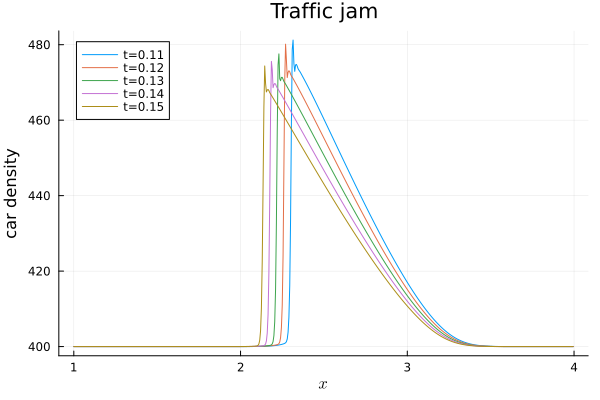

In [106]:
plt = plot(legend=:topleft,title="Traffic jam",
    xaxis=(L"x"),yaxis=("car density"))
x_max=Vector{Float64}();
v_theory = Vector{Float64}();
ts = Array((11:15)/100)
for t in ts
    push!(v_theory, (dQ0.(sol(t))[argmax(sol(t))] + dQ0(400)/2))
    push!(x_max, x[argmax(sol(t))])
    plot!(x,sol(t),label=@sprintf("t=%.2f",t))
end
plt

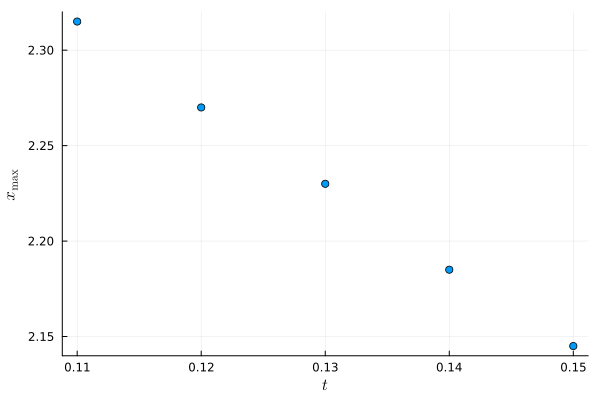

In [107]:
scatter(ts,x_max,legend=false,xaxis=(L"t"),yaxis=(L"x_{\max}"))

In [108]:
V = [ts.^0 ts] 
c  = V\x_max
c[2]

-4.249999999999974

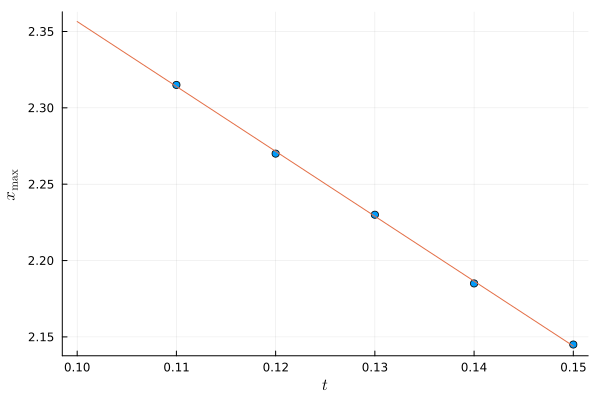

In [109]:
p = Polynomial(c)
plot!(p,0.1,0.15)

In [110]:
v_theory

5-element Vector{Float64}:
 -7.7831388224044975
 -7.720730342676038
 -7.572225432540901
 -7.45655319210833
 -7.3859474687229545

Maybe i don't understand what the 'bottom of the shock' is.

### 12.2 Upwinding and stability

*Definitions*

* Domain of dependence:  The region of space that can influence the solution at a point at a later time.

* Upwind / Downwind: If the domain of dependence is unidirectional, that direction is "upwind", the other direction "downwind". 

* Numerical domain of dependence:  The region of space that can influence the solution at a point at a later time, as determined by the numerical method.

* CFL Condition

    In order for a numerical method for an advection equation to converge to the correct solution, the limiting numerical domain of dependence must contain the exact domain of dependence.

Essentially, the numerical method must be able to "see" the true domain of dependence.  (Or maybe "smell" is a better metaphor, since we are talking about 'upwind' and 'downwind'.)

#### Example

Consider the advection equation with $c>0$ and a forward difference method:

$$
u_x(x_i,t_j) \approx \frac{U_{i+1,j}-U_{i-1,j}}{2h}.
$$

And use Euler time discretization:

$$
\mathbf{u}_{j+1} = (\mathbf{I} - c \tau \mathbf{D}_x) \mathbf{u}_j,
$$
 
Then we can see that at each time step, the numerical domain of dependance is a triangle that spreads with speed $h/\tau$. 

In order to cover the domain of dependence, we need to have $h/\tau \ge c$.  This is the CFL condition.

Fortunately, this kind of thing is taken care of automatically by good numerical solvers!

In [3]:
function demo(m)
    x,Dₓ = FNC.diffper(m,[0,1])
    uinit = @. exp(-80*(x-0.5)^2)
    ode = (u,c,t) -> -c*(Dₓ*u)
    IVP = ODEProblem(ode,uinit,(0.,2.),2.)
    return x,solve(IVP,RK4())
end

x,u = demo(400);
println("Number of time steps for m = 400: $(length(u.t))")

# Cut h by half
x,u = demo(800)
println("Number of time steps for m = 800: $(length(u.t))")

Number of time steps for m = 400: 565


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


Number of time steps for m = 800: 1128


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


#### Inflow boundary condition. 

* If the advection equation is posed on a finite domain, we need to specify a boundary condition. 

* Since it is first order in x, we only should have 1 boundary condition.  This should be at the upwind boundary, otherwise it would have no effect! - *Inflow boundary condition*.  $c>0$ this is on the left. Reverse for $c<0$

Demo:
Advection over $[0,1]$ with velocity $c=-1$.   Set inflow boundary condition is $u(1,t) = 0$.



In [4]:
m = 80
x,Dₓ = FNC.diffcheb(m,[0,1])

# interior points
int = 1:m

# add rightmost boundary point
extend = v -> [v;0]

function ode!(f,v,c,t)
    u = extend(v)
    uₓ = Dₓ*u
    @. f = -c*uₓ[int]
end;

In [5]:
init = @. exp(-80*(x[int]-0.5)^2)
ivp = ODEProblem(ode!,init,(0.,1),-1)
u = solve(ivp);

In [6]:
anim = @animate for t in range(0,1,length=161) 
    plot(x,extend(u(t)),label=@sprintf("t=%.4f",t),
        xaxis=(L"x"), yaxis=(L"u(x,t)",(0,1)), 
        title="Advection equation with inflow BC",dpi=100)
end
mp4(anim,"upwind-inflow.mp4")

┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\upwind-inflow.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\upwind-inflow.mp4")

### 12.3 Absolute stability

* CFL criterion gives a necessary but not sufficient condition for stability.

This section I am only going to gloss over, as it is important to be aware of these issues, but with modern software we don't have to re-invent the wheel here.

* As in chapter 11, we consider the "semidiscrete" point of view. 


$$
  \mathbf{u}' = -c \mathbf{D}_x \mathbf{u}.
$$


The eigenvalues of the matrix $-c \mathbf{D}_x$ are $\lambda_k = -i cm \sin(2 \pi k /m)$. 

* The eigenvalues are pure imaginary

* They are extend no further then $O(m) = O(1/h)$ from the origin.

Since the euler method doesn't include any of the imaginary line, we don't expect it to be stable for this problem no matter what the time step.  Backward euler is stable independent of time step since it does include the imaginary axis. 

* *many* PDEs that conserve quantities will have imaginary eigenvalues, so some methods will fail regardless of time step. 

* Text also notes that advection-diffusion problems, due to the diffusion, the eighenvalues move off of the imaginary axis, so more methods will be stable. The diffusion term acts as a stabilizer.

* Boundary effects (e.g. inflow ) can also have a stabilizing effect, moving the eigenvalues in the negative real direction. This is due to the decay of the solutions moving off the domain . 



### 12.4 The wave equation

$$
u_{tt} - c^2 u_{xx} = 0.
$$

Note that the advection equation can be written as: $(\partial_t + c \partial_x) u = 0$, and the wave equation can be seen as the result of applying the operator $\partial_t - c \partial_x$  to the advection equation:

$$
\begin{align}
(\partial_t - c \partial_x)(\partial_t + c \partial_x) u &= 0, \\
\partial_t^2 u - c^2 \partial_x^2 u &= 0.
\end{align}
$$

As with advection, $u(x,t) = u(x-ct,0)$ is a solution.  This is a wave moving at speed $c$ to the right. However, also $u(x,t) = u(x+ct,0)$ is a solution, so there is also a wave moving to the left. the initial condition on $u_t$ would different for these two waves.
 

For this chapter, we will use  $x \in [0,1]$ and $t>0$ as the domain.   

Boundary conditions
$$
u(0,t) = u(1,t) = 0, \qquad t \ge 0,
$$

And initial conditions:

$$
\begin{align}
u(x,0) &= f(x), \qquad 0 \le x \le 1,  \\
u_t(x,0) &= g(x), \qquad 0 \le x \le 1. 
\end{align}
$$

#### Method of lines

* We first need to transform into two first order equations.  Let $y = u_t$, then we have:

$$
\begin{align}
u_t &= y, \\
y_t &= c^2 u_{xx}.
\end{align}
$$

* However, there is another way to do this:

$$
\begin{align}
u_t &= z_x, \\
z_t &= c^2 u_{x}.
\end{align}
$$

THey call this the "Maxwell" form since it is similar to the equations of electromagnetism. It is first order in both space and time.



#### Exericse 12.4.1  

**(a)** Show that $u_{tt} = c^2 u_{xx}$.
    
**(b)** Show that $z_{tt} = c^2 z_{xx}$.

$$
\begin{align}
u_{tt} &= z_{xt} = z_{tx} = c^2 u_{xx} \\
z_{tt} &= c^2 u_{xt} = c^2 u_{tx} = c^2 z_xx  \\
\end{align}

####  Method of lines continued 

We need to specify our initial conditions differently:
$$
\begin{align}
u(x,0) &= f(x), \qquad 0 \le x \le 1,  \\
z(x,0) &= g(x), \qquad 0 \le x \le 1. 
\end{align}
$$


This leads to the system of equations (before imposing boundary conditions)

$$
  \begin{bmatrix}
    \mathbf{u}'(t) \\[2mm]  \mathbf{z}'(t)
  \end{bmatrix}
  =
  \begin{bmatrix}
    \boldsymbol{0} & \mathbf{D}_x \\[2mm] c^2 \mathbf{D}_x & \boldsymbol{0}
  \end{bmatrix}
  \begin{bmatrix}
    \mathbf{u}(t) \\[2mm] \mathbf{z}(t)
  \end{bmatrix}.
$$

The demo shows how we impose the conditions be removing the end values of u. 

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


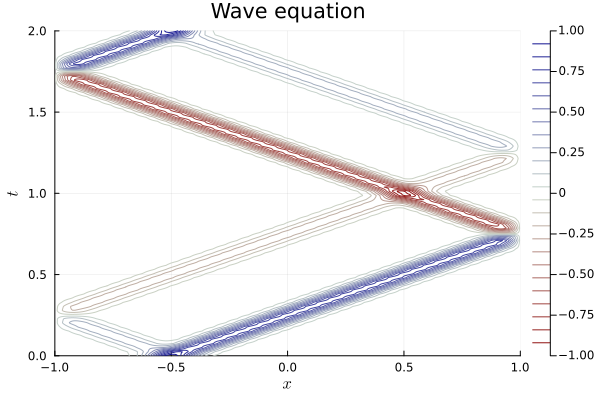

In [12]:
m = 200
x,Dₓ = FNC.diffcheb(m,[-1,1]);

# utilities to exend the interior to the boundary and then contract again
extend = v -> [0;v;0]
chop = u -> u[2:m];

# Compute the time derivative at *interior* points 
# note that w is [u,z] concatenated

ode = function(w,c,t)
    u = extend(w[1:m-1])
    z = w[m:2m]
    dudt = Dₓ*z
    dzdt = c^2*(Dₓ*u)
    return [ chop(dudt); dzdt ]
end;

# initial condition
u_init = @. exp(-100*(x+0.5)^2)
z_init = -u_init # arbitrary?
w_init = [ chop(u_init); z_init ];  


IVP = ODEProblem(ode,w_init,(0.,2.),2)
w = solve(IVP,RK4());


t = range(0,2,length=80)
U = [extend(w(t)[1:m-1]) for t in t]
contour(x,t,hcat(U...)',color=:redsblues,clims=(-1,1),
    levels=24,xlabel=L"x",ylabel=L"t",title="Wave equation",
    right_margin=3Plots.mm)

In [13]:


anim = @animate for t in range(0,2,length=120)
    plot(x,extend(w(t)[1:m-1]),label=@sprintf("t=%.3f",t),
        xaxis=(L"x"),yaxis=([-1,1],L"u(x,t)"),dpi=100,    
        title="Wave equation")
end
mp4(anim,"wave-boundaries.mp4")

┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\wave-boundaries.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\wave-boundaries.mp4")

#### Variable Speed

If the speed 'c' changes (for example, for light in a medium, or sound in different materials) we can replace $c^2$ with a diagonal matrix with the values of $c(x_i)$ on the diagonal.

In [14]:
ode = function(w,c,t)
    u = extend(w[1:m-1])
    z = w[m:2m]
    dudt = Dₓ*z
    dzdt = c.^2 .* (Dₓ*u) # slight change here to deal with c matrix
    return [ chop(dudt); dzdt ]
end;


# c = 1 for x < 0, c = 2 for x > 0
c = @. 1 + (sign(x)+1)/2
IVP = ODEProblem(ode,w_init,(0.,5.),c)
w = solve(IVP,RK4());

anim = @animate for t in range(0,5,length=181)
    plot(Shape([-1,0,0,-1],[-1,-1,1,1]),color=RGB(.8,.8,.8),l=0,label="")
    plot!(x,extend(w(t,idxs=1:m-1)),label=@sprintf("t=%.2f",t),
        xaxis=(L"x"),yaxis=([-1,1],L"u(x,t)"),dpi=100,   
        title="Wave equation, variable speed" )
end
mp4(anim,"wave-speed.mp4")

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\wave-speed.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\wave-speed.mp4")

Note the reflections on the boundary

#### Exercise 12.4.5

The equations $u_t=z_x-\sigma u$, $z_t=c^2u_{xx}$ model electromagnetism in an imperfect conductor. Repeat  Demo with $\sigma(x)=2+2\operatorname{sign}(x)$. (This causes waves in the half-domain $x>0$ to decay in time.)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


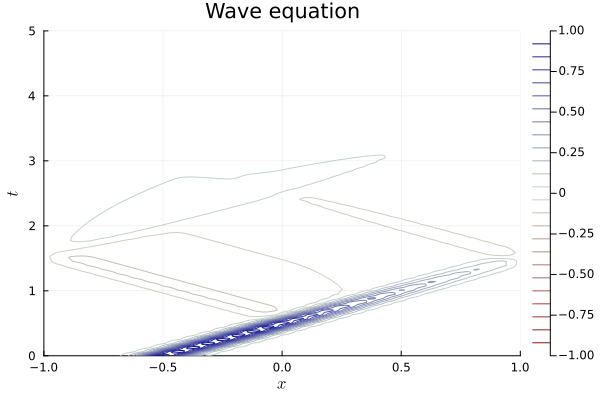

In [3]:
m = 200
x,Dₓ = FNC.diffcheb(m,[-1,1]);

extend = v -> [0;v;0]
chop = u -> u[2:m];

u_init = @. exp(-100*(x+0.5)^2)
z_init = -u_init # arbitrary?
w_init = [ chop(u_init); z_init ];  

ode = function(w,p,t)
    sigma = p[2]
    c = p[1]
    u = extend(w[1:m-1])
    z = w[m:2m]
    dudt = Dₓ*z - sigma .* u
    dzdt = c^2*(Dₓ*u)
    return [ chop(dudt); dzdt ]
end;

sigma = @. 2 + 2*sign(x)
c=1
IVP = ODEProblem(ode,w_init,(0.,5.),[c,sigma])
w = solve(IVP,RK4());

t = range(0,5,length=80)
U = [extend(w(t)[1:m-1]) for t in t]
contour(x,t,hcat(U...)',color=:redsblues,clims=(-1,1),
    levels=24,xlabel=L"x",ylabel=L"t",title="Wave equation",
    right_margin=3Plots.mm)

In [4]:
anim = @animate for t in range(0,5,length=181)
    plot(Shape([-1,0,0,-1],[-1,-1,1,1]),color=RGB(.8,.8,.8),l=0,label="")
    plot!(x,extend(w(t,idxs=1:m-1)),label=@sprintf("t=%.2f",t),
        xaxis=(L"x"),yaxis=([-1,1],L"u(x,t)"),dpi=100,   
        title="Exercise 12.4.5" )
end
mp4(anim,"ex12p4p5.mp4")

┌ Info: Saved animation to c:\Users\rjljr\devel\FNC\ex12p4p5.mp4
└ @ Plots C:\Users\rjljr\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\rjljr\\devel\\FNC\\ex12p4p5.mp4")